<a href="https://colab.research.google.com/github/JoaoGustavo29/Portfolio_DataScience/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## **Importando os Dados**

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
 
# Importar warnings filter
from warnings import simplefilter

# Ignorar futuros warnings
simplefilter(action='ignore', category=FutureWarning)

# Configurar o notebook
sns.set_style('dark')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
# Importar o arquivo
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# Importar o arquivo para um DataFrame
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## **Análise Exploratória**

* Plotar uma matriz de correlação

A fim de conhecermos nosso DataFrame, vamos checar como são as 5 primeiras entradas.

* É possível notar como os daods ficaram após a transformação após o PCA (Análise de Componentes Principais), assim deixando as features descaracterizadas (anônimas) e em valores numéricos. Para um melhor entendimento sobre PCA, [clique aqui](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

* Para que a análise inicial não fosse prejudicada, as colunas `Time` e `Amount` foram preservadas com seus valores originais.

* Nossa vairiávvel alvo está localizada na coluna `Class`, onde:
  * **1** é uma transação fraudulenta;
  * **0** é uma transação comum.

In [ ]:
# Visualizar as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Ver o resumo estatístico do dataframe

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Quando procuramos saber a respeito dos valores ausentes do dataset, não encontramos nenhum, assim não é nescessário um trabalho de limpeza. Abaixo é possivel verificar que nenhuma coluna possui valores nulos.

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Na [descrição dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud) é informado que as entradas relativas à transações fraudulentas representam apenas 0,17% do total.

Vamos verificar isso de forma visual, para isso iremos plotar um gráfico de barras.

No gráfico, fica nítida a discrepância entre os dados. Portanto, será nescessário fazer um balanceamento dos dados, para que nosso modelo não seja prejudicado ao treinar com dados desbalanceados.



0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



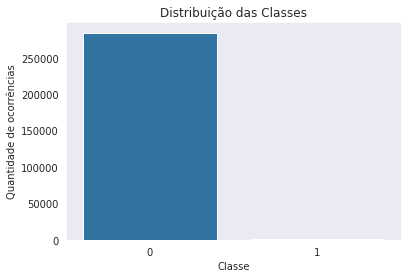

In [ ]:
# Checar o balanceamento das classes
print(df.Class.value_counts())
print('\nFraudes representam {:.4f}% do dataset.\n'.format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
fig , ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax);
ax.set_title('Distribuição das Classes')
ax.set_ylabel('Quantidade de ocorrências')
ax.set_xlabel('Classe')
plt.show();

Para compararmos o comportamento e a distribução das classes, foram plotados 4 gráficos.

Vamos ver o que esses gráficos nos dizem.

* 2 gráficos - Que usam como a referência a dimensão **tempo** (`Time`), no entanto, não foi indentificada nenhum informação a partir desses gráficos.

* 2 gráficos - Que usam como referência o valor das transações (`Amount`), nesses dois foi possível notar que o valor das transações comuns ficam entre 0 e 5000, diferentemente das transações fraudulentas que pouquissimas tem seu valor acima de 500.

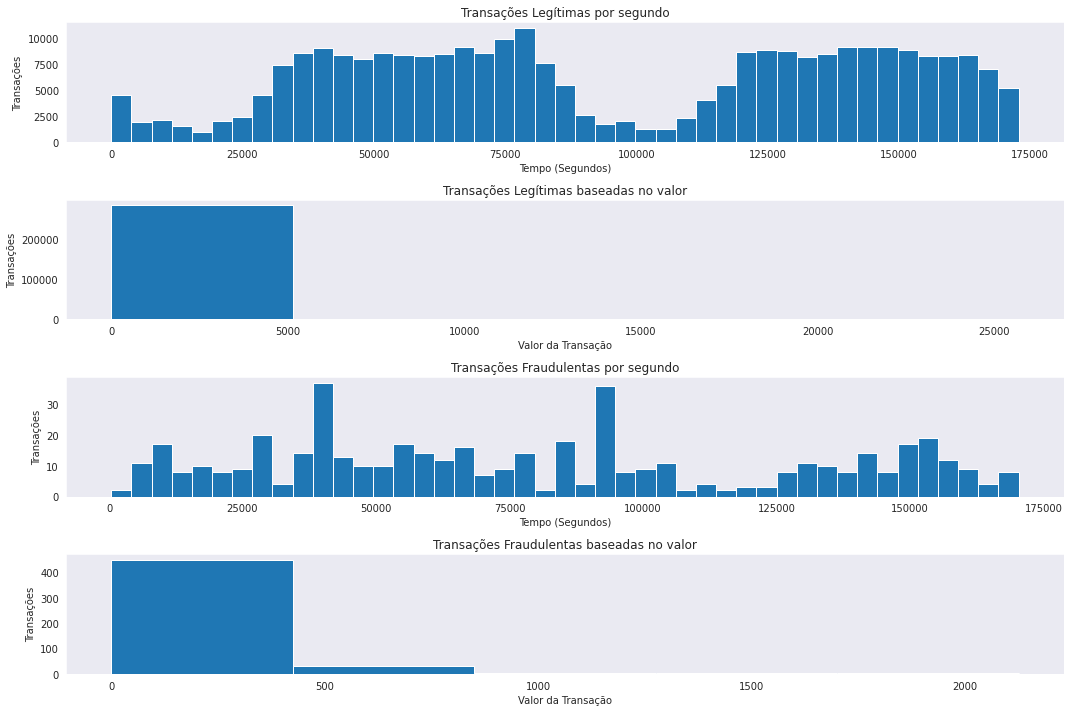

In [ ]:
# Plotar gráfico 
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,10))

# Definir número de barras dos gráficos
num_bins_time = 45
num_bins_amount = 5

# Gráfico 1
ax[0].hist(df.Time[df.Class == 0], bins=num_bins_time)
ax[0].set_title('Transações Legítimas por segundo')
ax[0].set_ylabel('Transações')
ax[0].set_xlabel('Tempo (Segundos)')

# Gráfico 2
ax[1].hist(df.Amount[df.Class == 0], bins=num_bins_amount)
ax[1].set_title('Transações Legítimas baseadas no valor')
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Valor da Transação')

# Gráfico 3
ax[2].hist(df.Time[df.Class == 1], bins=num_bins_time)
ax[2].set_title('Transações Fraudulentas por segundo')
ax[2].set_ylabel('Transações')
ax[2].set_xlabel('Tempo (Segundos)')

# Gráfico 4
ax[3].hist(df.Amount[df.Class == 1], bins=num_bins_amount)
ax[3].set_title('Transações Fraudulentas baseadas no valor')
ax[3].set_ylabel('Transações')
ax[3].set_xlabel('Valor da Transação')

# Mostrar gráficos
plt.tight_layout();

Foram plotados também, boxplots, uma ótima ferramenta para se há diferença no padrão das transações em relação ao seu valor (`Amount`).

Portanto, é possivel notar que há uma distribuição diferente para as duas classes, o que deve beneficiar o treinamento dos nossos modelos.

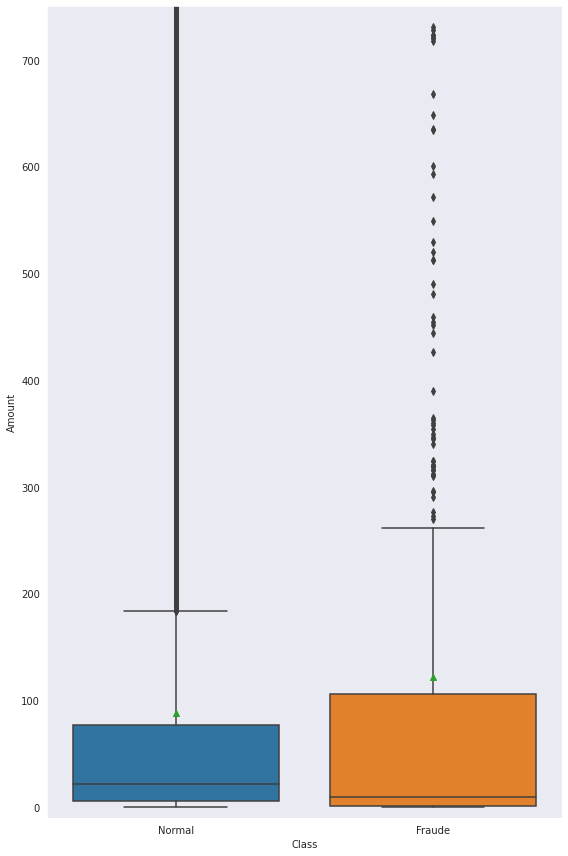

In [ ]:
# Plotar Boxplot
fig , ax = plt.subplots(figsize=(8, 12), sharex=True)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax, orient='v')

# Definir limites
plt.ylim((-10, 750))
plt.xticks([0, 1],['Normal', 'Fraude'])

# Mostrar Boxplot
plt.tight_layout();

# **Apresentação dos Modelos**

Para mostrar a diferença de desempenhho entre modelos treinados com dados balanceados e desbalanceados, irei construir 8 modelos:

* 4 de **Regressão Logística**
  * 1 com os dados desbalanceados;
  * 3 com diferentes métodos de balanceamento de dados.
* 4 de **Árvores de Decisão**
  * 1 com os dados desbalanceados;
  * 3 com diferentes métodos de balanceamento de dados.





## **Preparação dos Dados**



**Padronizar `Time` e `Amount`**

Nessa etapa, iremos normalizar os dados da coluna `Time` e `Amount`, que possuíam seus valores originais. Para isso, a padronização será feita por meio da classe `StandardScaler`.

In [ ]:
# Importar pacotes nescessários do Scikit-Learn para preparar os dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Criar cópia do DataFrame 
df_clean = df.copy()

# Padronizar as colunas Time e Amount
scaler = StandardScaler()
df_clean['Scaler_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['Scaler_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaler_amount,Scaler_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Separar dados entre Treino e Teste**

Iremos também dividir o conjunto de dados entre treino e teste, assim poderemos testar o modelo com um conjunto de dados que ele não teve contato.

In [ ]:
# Separar os dados entre feature matrix e target vector 
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**Balanceamento dos dados**

E por último iremos balancear os dados, de forma que nossos modelos tenham um melhor desempenho na hora de identificar transações fraudulentas. Dessa forma, também evitamos o *overfitting* (quando um modelo se torna muito bom em dados ja vistos, mas não tem um bom desempenho em dados novos)

Serão utilizados 3 métodos de balanceamento:

* **RandomUnderSampling (RUS)** - Este método descarta um subjconjunto aleatório da classe majoritária, preservando as características da classe minoritária, ideal para quando se há um grande volume de dados. Este método pode acarretar em um performance inferior na hora de fazer predições da classe majoritária.

* **ADASYN** - Gera novas amostras, próximas às originais que são classificadas de forma errada usando um classificador K-Nearest Neighbors. Para entender melhor este método, [clique aqui](https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn). 

* **SMOTE** - Enquanto isso a implementação básica do **SMOTE**, não fará distinção entre amostras fáceis e difíceis de serem classificadas. 

### Balanceamento dos Dados com Under-Sampling (RUS)

1    369
0    369
dtype: int64


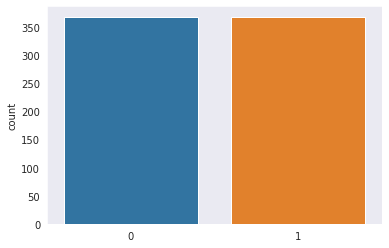

In [ ]:
# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_rus);

### Balanceamento dos Dados com Over-Sampling (SMOTE) 


1    213236
0    213236
dtype: int64


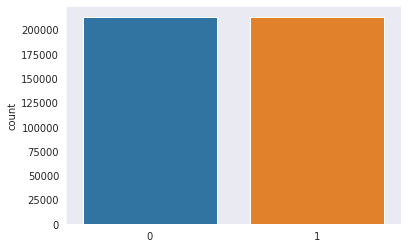

In [ ]:
# Balanceamento dos dados
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_smo).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_smo);

### Balanceamento dos Dados com Over-Sampling (ADASYN)

1    213243
0    213236
dtype: int64


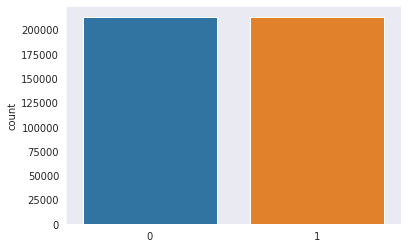

In [ ]:
# Balanceamento dos dados
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_ada).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_ada);

Após balancear os dados podemos plotar matrizes de correlação e identificar quais variáveis estão mais relacionadas com as outras e ver como cada balanceamento influenciou nessa correlação.

Antes do balanceamento, não era possível tirar informações relevantes da matriz de correlação, agora podemos ver como cada variável se comporta em função de outra.

Podemos perceber também que a forma que a relação não muda independentemente se os dados foram balanceados com RUS ou com SMOTE, mas quando olhamos para a matriz dos dados balanceados com ADASYN é possível notar uma diferença clara entre a relação das variáveis.

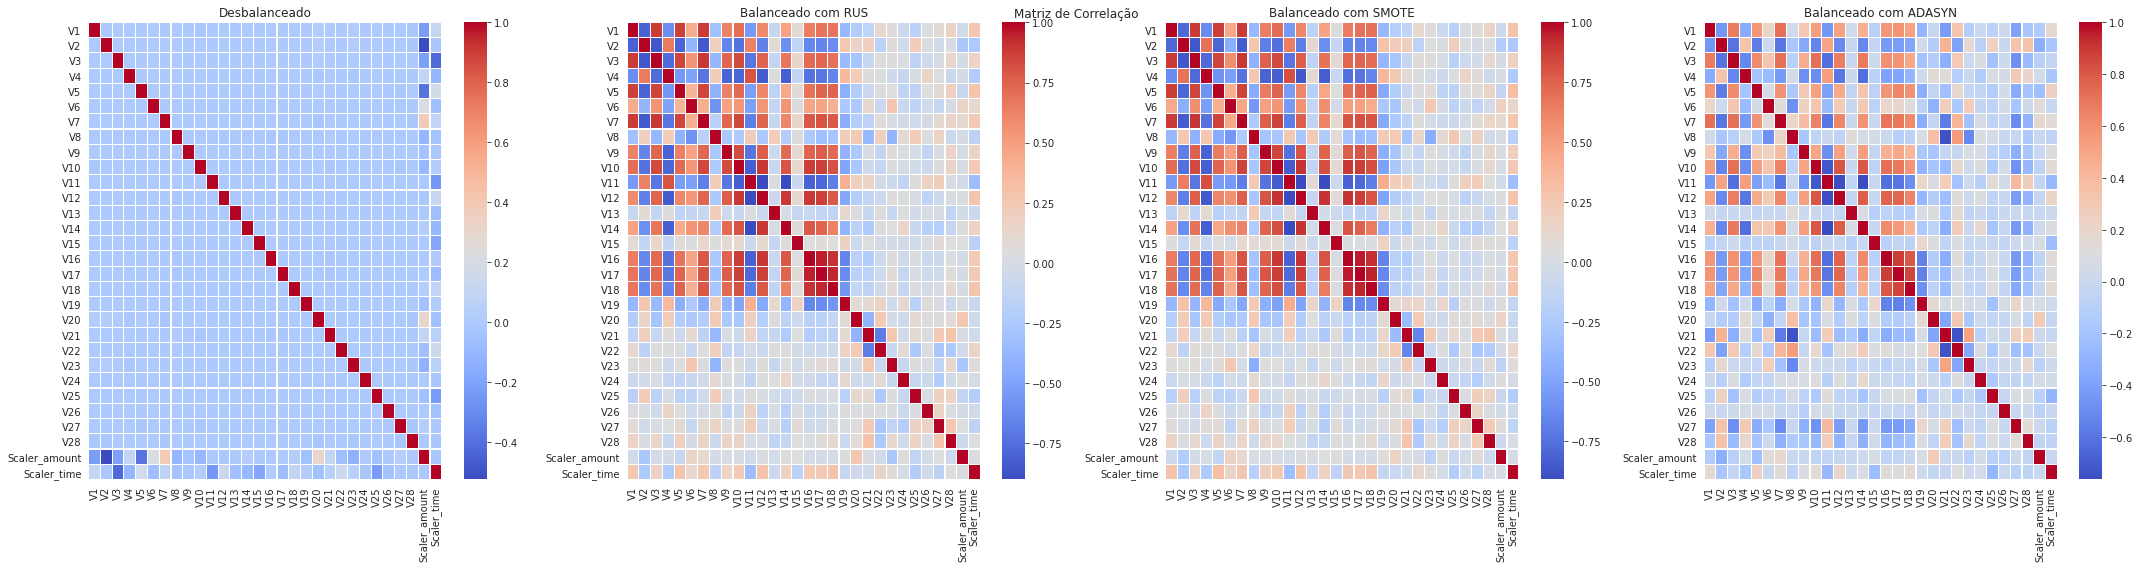

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()
corr_smo = pd.DataFrame(X_smo).corr()
corr_ada = pd.DataFrame(X_ada).corr()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (30,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado com RUS')

sns.heatmap(corr_smo, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[2])
ax[2].set_title('Balanceado com SMOTE')

sns.heatmap(corr_ada, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[3])
ax[3].set_title('Balanceado com ADASYN')

plt.tight_layout()

# **Machine Learning**

Primeiro, vamos começar entendendo o que é *Machine Learning*.

O algoritmo de aprendizagem de máquina (Machine Learning), também chamado de modelo, é uma expressão matemática que representa informação ou dados no contexto de qualquer problema em particular, que muitas vezes é um problema comercial. O principal objetivo é **ir dos dados para a percepção**, por meio do algoritmo.

Antes de continuarmos, vamos deixar claro que existem duas categorias de aprendizagem de máquina: supervisionada e não supervisionada.

Neste projeto, trabalharemos apenas com **modelos supervisionados**. 

Modelos supervisionados, são usados quando queremos **explicar ou prever dados**, isso é feito com a ajuda de dados antigos que serão destinados ao treino do modelo e assim ele será capaz de prever dados de saída para novas entradas.

## **Regressão Logística**

A Regressão Logística é um algoritmo de aprendizado de máquina que é usado para os problemas de classificação, é um algoritmo de análise preditiva e se baseia no conceito de probabilidade.

Caso queira um entendimento aprofundado sobre regressão logística, [clique aqui!](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)

### Construção do Modelo sem Balanceamento dos Dados

Antes de começarmos a construir este modelo, vamos relembrar como estão distribuídas as classes, essa será a distribuição com a qual ele irá treinar. Então, não se assuste caso haja um desempenho inferior.

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



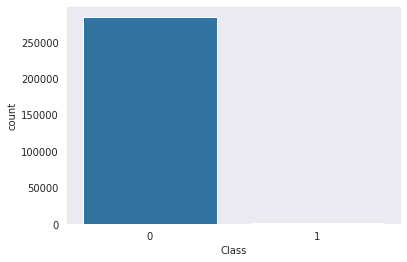

In [ ]:
# Checar o balanceamento das classes
print(df.Class.value_counts())
print('\nFraudes representam {:.4f}% do dataset.\n'.format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
sns.countplot('Class', data=df);

Para construir o modelo, vamos escolher e importar diretamente do Scikit-learn.

O processo de treino deste modelo, será feito apenas com os dados divididos entre treino e teste, mas não com dados balanceados.

In [ ]:
# Escolher e importa um modelo
from sklearn.linear_model import LogisticRegression

# Escolher e instanciar os Hyperparameters
model_log = LogisticRegression()

# Fit do Modelo (Treinar)
model_log.fit(X_train, y_train)

# Fazer previsões em cima de novos dados 
y_pred_log = model_log.predict(X_test)

#### Avaliando o Desempenho do Modelo

Aqui vamos imprimir um **relatório de confusão**, a **área sob a curva (AUC)** e uma **matriz de confusão**. Isso nos ajudará a avaliar o desempenho do nosso modelo, de forma que poderemos comparar com os modelos seguintes e dizer qual possui um melhor desempenho na detecção de fraudes.

Uma ótima métrica que podemos utilizar para ver a taxa de acertos de fraude é a coluna *recall* do relatório de classificação

O **AUC** é uma das melhores métricas na hora de avaliar seu modelo, uma vez que quando as previsões estão 100% erradas seu valor é zero e quando estão 100% certas seu valor é 1. Cada modelo vai apresentar um valor de AUC, isso nos auxilia a escolher o melhor modelo. Para entender melhor o AUC, [clique aqui!](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772)

Abaixo podemos ver que:

* Nosso modelo possui uma grande quantidade de falsos negativos (**46 transações fraudulentas** classificadas como comuns), o que não é nada bom, pois o cliente ou o banco terá de arcar com esses custos.

* Houve um ótimo desempenho para prever as transações comuns, mas um desempenho abaixo do esperado na hora de prever fraudes (**apenas 77**).

* Em casos como este a precisão e a acurácia não são nossa prioridade, uma vez que se o modelo errar mais para falsos positivos e menos para falsos negativos, já é um grande avanço. 

* O **AUC** deste modelo não foi dos piores, mas é possível nós melhorarmos esse **0.8130**

In [ ]:
# Instalar pacote para plotar matriz de confusão
!pip install -q scikit-plot

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9999    0.9996     71079
           1     0.9059    0.6260    0.7404       123

    accuracy                         0.9992     71202
   macro avg     0.9526    0.8130    0.8700     71202
weighted avg     0.9992    0.9992    0.9992     71202

AUC: 0.8130



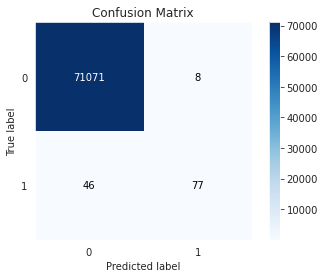

In [ ]:
# Importar pacotes para avaliar o desempenho do modelo 
from sklearn.metrics import classification_report
import scikitplot as skplt

# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log)

# Imprimir Relatório de Classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred_log, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_log)))

### Construção do Modelo (RUS)

Aqui o processo é bem parecido, a grande diferença é que nosso modelo será treinado com dados balanceados pelo método (RUS) e depois fará suas previsões em cima dos dados de teste.

In [ ]:
# Escolher e instanciar os Hyperparameters
model_log_rus = LogisticRegression()

# Fit do modelo (Treinar)
model_log_rus.fit(X_rus, y_rus)

# Fazer previsões em cima de novos dados 
y_pred_rus = model_log_rus.predict(X_test)

#### Avaliando o Desempenho do Modelo

Dessa vez, nossas métricas nos dizem que:

* A quantidade de falsos negativos diminuiu **consideravelmente** (de 46 para 10), o que é um ponto positivo. Dessa forma, o banco terá menos prejuízo na hora de arcar com essas transações. 

* Com a melhora na previsão de fraudes (**de 77 para 113**) quase o dobro, houve também um grande aumento nos falsos positivos (**de 8 para 2710**), mas isso era esperado e não é o pior cenário possível.

* Esse modelo teve um excelente **AUC** - **0.9403**

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9619    0.9805     71079
           1     0.0400    0.9187    0.0767       123

    accuracy                         0.9618     71202
   macro avg     0.5199    0.9403    0.5286     71202
weighted avg     0.9982    0.9618    0.9789     71202

AUC: 0.9403



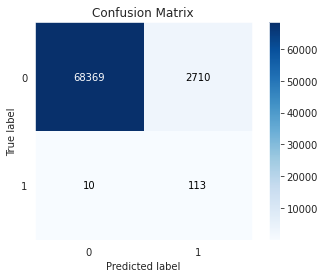

In [ ]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rus)

# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_test, y_pred_rus, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_rus)))

### Construção do Modelo (SMOTE)

Neste caso, nosso modelo será treinado com dados balanceados pelo método (SMOTE) e depois fará suas previsões em cima dos dados de teste.

In [ ]:
# Escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# Escolher e instanciar os Hyperparameters
model_log_smo = LogisticRegression()

# Fit do modelo (Treinar)
model_log_smo.fit(X_smo, y_smo)

# Fazer previsões em cima de novos dados 
y_pred_smo = model_log_smo.predict(X_test)

#### Avaliando o Desempenho Modelo

Com este modelo, podemos ver que:

* A quantidade de falsos negativos teve um aumento, quando comparado ao modelo (RUS), **foram 12 falsos negativos contra 10**.

* A quantidade de fraudes previstas também sofreu alterações, **foram 111 contra 113 do modelo (RUS)**.

* Porém, o diferencial deste modelo é que a quantidade de falsos positivos diminuiu bastante (**de 2710 para 1702**) uma diminuição de **mais de 1000 casos**, fazendo com que os clientes do banco que utilizasse esse modelo, tivessem seus cartões bloqueados, menos vezes.

* Esse modelo teve um excelente **AUC** mas não o melhor - **0.9392**

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9761    0.9878     71079
           1     0.0612    0.9024    0.1147       123

    accuracy                         0.9759     71202
   macro avg     0.5305    0.9392    0.5512     71202
weighted avg     0.9982    0.9759    0.9863     71202

AUC: 0.9392



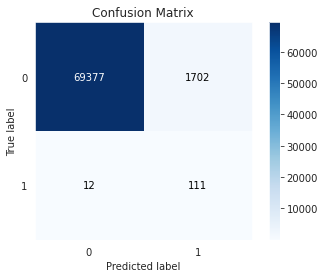

In [ ]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smo)

# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_test, y_pred_smo, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_smo)))

### Construção do Modelo (ADASYN)

Neste caso, nosso modelo será treinado com dados balanceados pelo método (ADASYN) e depois fará suas previsões em cima dos dados de teste.

In [ ]:
# Escolher e plotar um modelo
model_log_ada = LogisticRegression()

# Fit do modelo (Treinar)
model_log_ada.fit(X_ada, y_ada)

# Fazer previsões em cima de novos dados 
y_pred_ada = model_log_ada.predict(X_test)

#### Avaliando o Desempenho Modelo

Nosso último modelo de regressão logística, nele temos resultados interessantes, vamos dar uma olhada:

* A quantidade de falsos negativos foi a menor dos nossos modelos de regressão logística, sendo apenas **6 falsos negativos**, contra as **10 do modelo (RUS)**.

* A quantidade de fraudes previstas foi a maior entre todos os modelos, foram **117 fraudes previstas**, enquanto os outros modelos não passavam de **113 previsões**.

* Porém, um ponto negativos deste modelo é que a quantidade de falsos positivos aumentou bastante, tendo a maior quantidade quando comparado aos outros modelos (sendo **6533 contra os 1702 do modelo SMOTE**), assim os clientes do banco que escolhesse esse modelo, teriam seus cartões bloqueados mais vezes, mas em compensação teriam menos prejuízo, caso seu cartão fosse fraudado.

* Esse modelo teve o menor **AUC** dos modelos que treinaram com dados balanceados - **0.9297**

Porém, vale lembrar que o AUC sozinho não é suficiente para dizer que esse é o melhor ou o pior modelo, pois depende de qual a solução mais eficiente para a instituição. Às vezes, a melhor solução para o banco é aquela que vai ter uma maior quantidade de falsos positivos e ter menos falsos negativos, do que o contrário.

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9999    0.9081    0.9518     71079
           1     0.0176    0.9512    0.0345       123

    accuracy                         0.9082     71202
   macro avg     0.5088    0.9297    0.4932     71202
weighted avg     0.9982    0.9082    0.9502     71202

AUC: 0.9297



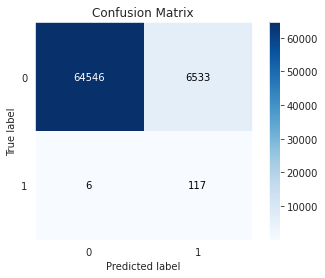

In [ ]:
# Plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ada)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_ada, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_ada)))

## **Árvores De Decisão (Decision Trees)**

Os processos a seguir são extremamente parecidos com o que fizemos anteriormente, porém agora o modelo será uma árvore de Decisão, assim usando um método diferente para classificar as transações.

Dessa forma, seremos capazes de definir qual modelo seria melhor para Detecção de Fraude, uma árvore de decisão ou uma regressão logística.

Para melhor compreensão, irei dar uma breve explicação de como um modelo de Árvore de Decisão funciona.

As árvores de decisão são construídas a partir de um processo de indução, onde os dados são divididos em subconjuntos cada vez mais puros, dessa forma é encontrada a maior pureza em sua classificação. Para selecionar quais atributos serão utilizados na composição da árvore, é considerado o grau de entropia de um nó e a informação ganha após um split.

Para uma visualização gráfica de como é construída uma árvore, acesse [o link do R2D3](http://www.r2d3.us/uma-introducao-visual-ao-aprendizado-de-maquina-1/).

### Construção do Modelo sem Balanceamento dos Dados

Para construir o modelo, mais uma vez vamos escolher e importar diretamente do Scikit-learn.

O processo de treino deste modelo, será feito apenas com os dados divididos entre treino e teste, mas não com dados balanceados.

In [ ]:
# Escolher e importar o modelo
from sklearn.tree import DecisionTreeClassifier

# Escolher os Hyperparameters
model_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree.fit(X_train, y_train)

# Fazer previsões em cima dos dados de teste
y_pred_tree = model_tree.predict(X_test)

#### Avaliando o Desempenho do Modelo

Aqui vamos usar as mesmas métricas que você já está familiarizado, o **relatório de confusão**, a **área sob a curva (AUC)** e uma **matriz de confusão**. 

Lembre-se sempre que podemos ver a taxa de acertos de fraude na coluna *recall* do relatório de classificção.

Vamos dar uma olhada em como nosso primeiro modelo de árvore de decisão se comportou:

* Nosso modelo possui uma quantidade menor de falsos negativos que o primeiro modelo de RL (Regressão Logística) (**34 contra as 46 transações fraudulentas** classificadas como comuns), aqui podemos ver que uma árvore de decisão teve um desempenho melhor com dados desbalanceados.

* Houve um ótimo desempenho para prever as transações comuns, até mesmo melhor que o modelo de RL, mas um desempenho abaixo do que seria satisfatório (**89 contra 77**).

* **Lembrando mais uma vez**, em casos como este a precisão e a acurácia não são nossa prioridade, uma vez que se o modelo errar mais para falsos positivos e menos para falsos negativos, já é um grande avanço. 

* O **AUC** deste modelo foi melhor que o nosso modelo de RL **0.8617**. 

Até o momento, tudo indica que modelos de **Árvore de Decisão são melhores** nessa situação, mas será que apenas com dados desbalanceados ou com balanceados também, vamos checar isso também.

              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     71079
           1     0.9368    0.7236    0.8165       123

    accuracy                         0.9994     71202
   macro avg     0.9682    0.8617    0.9081     71202
weighted avg     0.9994    0.9994    0.9994     71202

AUC: 0.8617



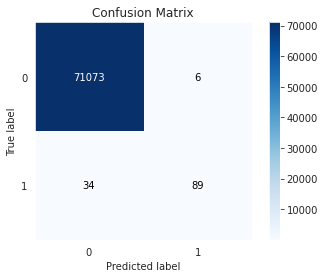

In [ ]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree)

# Imprimir classification report
print(classification_report(y_test, y_pred_tree, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree)))

### Construção do Modelo (RUS)

Aqui nosso modelo será treinado com dados balanceados pelo método (RUS) e depois fará suas previsões em cima dos dados de teste.

Vamos ver se esse modelo se sai melhor que o modelo de RL (RUS).

In [ ]:
# Escolher os hyperparameters 
model_tree_rus = DecisionTreeClassifier(max_depth=8, criterion='entropy')

# Fit do Modelo (Treinar)
model_tree_rus.fit(X_rus, y_rus)

# Fazer previsões em cima dos dados de teste
y_pred_tree_rus = model_tree_rus.predict(X_test)

#### Avaliando o desempenho do modelo

Vamos dar uma olhada em como nosso primeiro modelo de árvore de decisão se comportou:

* A quantidade de falsos negativos diminuiu **consideravelmente** (de 34 para 13), o que é um ponto positivo, mas infelizmente o modelo de RL teve um desempenho melhor ao treinar com esses dados. 

* Houve uma melhora na previsão de fraudes (**de 89 para 110**) e isso gerou um grande aumento nos falsos positivos (**de 6 para 6863**), isso foi um tanto quanto inesperado, esse aumento se torna desastroso quando comparado ao modelo de RL.

* O **AUC** - **0.8989** foi o menor quando comparado aos modelos treinados com dados balanceados.  




Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9034    0.9492     71079
           1     0.0158    0.8943    0.0310       123

    accuracy                         0.9034     71202
   macro avg     0.5078    0.8989    0.4901     71202
weighted avg     0.9981    0.9034    0.9476     71202

AUC: 0.8989



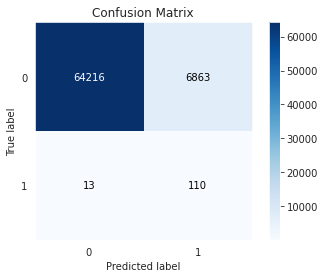

In [ ]:
# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_rus)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_tree_rus, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree_rus)))

### Construção do Modelo (SMOTE)

Neste caso, este modelo será treinado com dados balanceados pelo método (SMOTE) e depois fará suas previsões em cima dos dados de teste.

In [ ]:
# Escolher os Hyperparameters
model_tree_smo = DecisionTreeClassifier(max_depth=6, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree_smo.fit(X_smo, y_smo)

# Fazer previsões em cima dos dados de teste
y_pred_tree_smo = model_tree_smo.predict(X_test)

#### Avaliando o Desempenho do Modelo

Com este modelo, podemos ver que:

* A quantidade de falsos negativos teve um aumento, quando comparado ao modelo de árvore (RUS), **foram 13 falsos negativos para 18**.

* A quantidade de fraudes previstas caiu , **foram 111 contra 113 do modelo de árvore (RUS)**.

* Porém, esse modelo de árvore foi o que menos apresentou quantidades de falsos positivos (**são 3588 contra os 6863 do modelo anterior**) uma diminuição de **mais de 3200 casos**, fazendo com que os clientes do banco que utilizasse esse modelo, tivessem seus cartões bloqueados, menos vezes.

* Esse modelo teve um excelente **AUC** mas não o melhor - **0.9016**

Os modelos de RL ainda aparentam ter um desempenho melhor na hora de detectar fraudes.

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9997    0.9495    0.9740     71079
           1     0.0284    0.8537    0.0550       123

    accuracy                         0.9494     71202
   macro avg     0.5141    0.9016    0.5145     71202
weighted avg     0.9981    0.9494    0.9724     71202

AUC: 0.9016



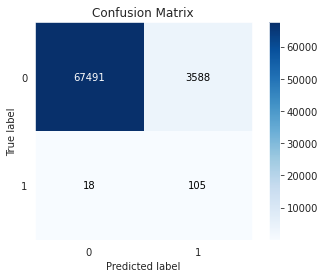

In [ ]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_smo)

# Imprimir classification report
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_tree_smo, digits=4))

# Imprimir área sob curva 
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test,y_pred_tree_smo)))

### Construção do Modelo (ADASYN)

Neste caso, este modelo será treinado com dados balanceados pelo método (ADASYN) e depois fará suas previsões em cima dos dados de teste.

In [ ]:
# Escolher os Hyperparameters
model_tree_ada = DecisionTreeClassifier(max_depth=8, criterion='entropy')

# Fit do Modelo (Treinar)
model_tree_ada.fit(X_ada, y_ada)

# Fazer previsões em cima dos dados de teste
y_pred_tree_ada = model_tree_ada.predict(X_test)

#### Avaliando o Desempenho do Modelo

O último modelo de Árvore de Decisão, nele temos os resultados mais equilibrados, mas não os melhores, vamos dar uma olhada:

* A quantidade de falsos negativos não foi a menor e nem a maior entre os modelos de árvore, estando no meio **15 falsos negativos**, contra as **13 do modelo de árvore (RUS)**.

* A quantidade de fraudes se manteve no meio mais uma vez, foram **108 fraudes previstas**, enquanto outro modelo foi capaz de realizar **110 previsões**.

* Assim como o modelo (ADASYN) de RL, o modelo de árvore também tem um ponto negativo quanto a quantidade de falsos positivos (sendo **4032 contra os 3588 do SMOTE**), mas vale lembrar que esse não é o modelo com a maior quantidade de falsos positivos. 

* Esse modelo teve o maior **AUC** dos modelos de árvore - **0.9107**

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9433    0.9707     71079
           1     0.0261    0.8780    0.0507       123

    accuracy                         0.9432     71202
   macro avg     0.5129    0.9107    0.5107     71202
weighted avg     0.9981    0.9432    0.9691     71202

AUC: 0.9107



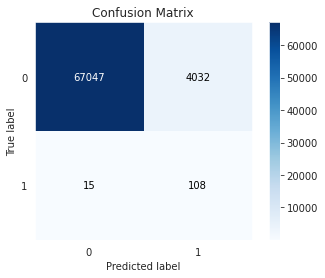

In [ ]:
# Plotar Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_ada)

# Imprimir classification report
print('Relatório de classificação: \n', classification_report(y_test, y_pred_tree_ada, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree_ada)))

## Conclusão

Como podemos ver, esse é um projeto diferente dos outros, uma vez que não possuía valores ausentes e não foi nescessário fazer um limpeza dos dados. Apesar de termos lidado com dados de qualidade e bem limpos, precisamos lidar com o desbalanceamento e a Transformação PCA, essa foi a parte mais trabalhosa.

É possível concluir que:

* Algoritmos de Regressão Logística possuem um desempenho melhor quando lidam com **dados balanceados**.

* Algoritmos de Árvore de Decisão foram superiores ao lidar com **dados desbalanceados**.

* A melhor solução é aquela que melhor atende a instituição, podendo ser a com o maior **AUC** ou a com o maior número de detecção de fraudes.

* O algoritmo que melhor conseguiu prever fraudes foi o **Modelo de Regressão Logística** que treinou com dados balanceados pelo método **ADASYN**.